In [32]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

In [33]:
# Load original dataset
df_original = pd.read_excel('../data/Cohort_anonymized_data_VOCs.xlsx', index_col=0)

In [34]:
df_original.head()

,age_enrollment,gender,ethnicity,vax_DTP,vax_IPV/OPV,vax_HBV,vax_Hib,vax_MPR,vax_Varicella,vax_PCV,...,probable_contact_date,contact_type_households,contact_type_familiar_outside_households,contact_type_close room,contact_type_intrahospital,contact_type_recent_fly_travel,contact_type_other,NPH_swab_result,NPH_swab_date,management.1
record_id,,,,,,,,,,,,,,,,,,,,,
F002-d,0.106849,f,5.0,0,0,0,0,0,0,0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-06,2.0
F012-d,0.191781,m,5.0,1,1,1,1,0,0,0,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-21,1.0
F010-b,0.287671,f,3.0,1,1,1,1,0,0,0,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-10,2.0
F166-a,0.293151,f,5.0,1,1,1,1,0,0,1,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-12-19,4.0
F071-a,0.312329,f,5.0,1,1,1,1,1,1,1,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-10-15,4.0


In [35]:
df_original.shape[0]

715

In [36]:
df_original.columns.tolist()

['age_enrollment',
 'gender',
 'ethnicity',
 'vax_DTP',
 'vax_IPV/OPV',
 'vax_HBV',
 'vax_Hib',
 'vax_MPR',
 'vax_Varicella',
 'vax_PCV',
 'vax_ACWY',
 'vax_MenB',
 'vax_Rotavirus',
 'vax_BCG',
 'vax_other',
 'vax_unvaccinated',
 'vax_unknown',
 'vax_flu_2019-2020',
 'vax_flu_2020_2021',
 'vax_covid_firstdose',
 'vax_covid_firstdose_date',
 'vax_covid_seconddose',
 'vax_covid_seconddose_date',
 'vax_covid_thirddose',
 'vax_covid_thirddose_date',
 'com_prematurity',
 'com_obesity',
 'com_malnutrition',
 'com_diabetes',
 'com_asthma',
 'com_chronic-resp-disease',
 'com_tracheostomy',
 'com_congenital-heart-disease',
 'com_rheumatic-disease',
 'com_neprhopathy',
 'com_neurological-disease',
 'com_ematological-disease',
 'com_TCSE',
 'com_SOT',
 'com_tumor',
 'com_primary-immunodeficiency',
 'com_HIV',
 'com_immunosuppressant-treatment',
 'com_chronic-hepatitis',
 'com_metabolic-disorders',
 'com_others',
 'com_nocom',
 'enrollment_date',
 'baseline_date_infection',
 'baseline_definition',

In [37]:
# Filter dataset with the following eligibility criteria:
# - Exclude individuals more than 20 years old
# - Exclude individuals without baseline date of infection
# - Exclude individuals with negative test against COVID-19
#df_original['baseline_date_infection'] = pd.to_datetime(df_original['baseline_date_infection'], errors='coerce')
df_f = filter_dataset(df_original)
print("Size of filtered dataset: ", df_f.shape[0])

Individuals aged more than 20 years old:  15
Individuals without baseline date of infection:  119
Size of filtered dataset:  581


In [38]:
# Considering only risk factors associated with severe pediatric COVID-19
df_f_risk = get_only_severeriskfactors(df_f)

In [39]:
# Fix covid-19 vaccination information using approval of vaccines
df_f_risk = fix_covid_vaccination(df_f_risk)
df_f_risk

Individuals with missing values: 81


,age_enrollment,gender,ethnicity,vax_DTP,vax_IPV/OPV,vax_HBV,vax_Hib,vax_MPR,vax_Varicella,vax_PCV,...,probable_contact_date,contact_type_households,contact_type_familiar_outside_households,contact_type_close room,contact_type_intrahospital,contact_type_recent_fly_travel,contact_type_other,NPH_swab_result,NPH_swab_date,management.1
record_id,,,,,,,,,,,,,,,,,,,,,
F002-d,0.106849,f,5.0,0,0,0,0,0,0,0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-06,2.0
F012-d,0.191781,m,5.0,1,1,1,1,0,0,0,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-21,1.0
F010-b,0.287671,f,3.0,1,1,1,1,0,0,0,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-03-10,2.0
F166-a,0.293151,f,5.0,1,1,1,1,0,0,1,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-12-19,4.0
F071-a,0.312329,f,5.0,1,1,1,1,1,1,1,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2020-10-15,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F015-d,18.810959,f,5.0,1,1,1,1,1,0,1,...,NaT,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-04-23,1.0
F124-d,19.309589,f,5.0,1,1,1,1,1,1,1,...,NaT,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2020-08-07,4.0
F332-d,19.578082,f,5.0,0,0,0,0,0,0,0,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2021-03-02,1.0


In [40]:
# Data manipulation 
df_f_risk = data_manipulation(df_f_risk)

In [42]:
df_f_risk.columns.tolist()

['age_enrollment',
 'gender',
 'ethnicity',
 'vax_DTP',
 'vax_IPV/OPV',
 'vax_HBV',
 'vax_Hib',
 'vax_MPR',
 'vax_Varicella',
 'vax_PCV',
 'vax_ACWY',
 'vax_MenB',
 'vax_Rotavirus',
 'vax_BCG',
 'vax_other',
 'vax_unvaccinated',
 'vax_unknown',
 'vax_flu_2019-2020',
 'vax_flu_2020_2021',
 'vax_covid_firstdose',
 'vax_covid_firstdose_date',
 'vax_covid_seconddose',
 'vax_covid_seconddose_date',
 'vax_covid_thirddose',
 'vax_covid_thirddose_date',
 'com_prematurity',
 'com_obesity',
 'com_diabetes',
 'com_asthma',
 'com_chronic-resp-disease',
 'com_congenital-heart-disease',
 'com_neurological-disease',
 'com_TCSE',
 'com_SOT',
 'com_tumor',
 'com_primary-immunodeficiency',
 'com_immunosuppressant-treatment',
 'enrollment_date',
 'baseline_date_infection',
 'baseline_definition',
 'WHO_stage',
 'management',
 'covid_symptoms',
 'sym_fever',
 'sym_rhinitis',
 'sym_cough',
 'sym_dyspnea',
 'sym_ear-pain',
 'sym_myalgia',
 'sym_arthralgia',
 'sym_sore-throat',
 'sym_smell-taste-alterations'

In [44]:
# Check prevalence of comorbidities
# columns that start with 'com_' are symtpoms
dict_com_prev = {}
cols_coms = ['com_prematurity',
 'com_obesity',
 'com_malnutrition',
 'com_diabetes',
 'com_asthma',
 'com_chronic-resp-disease',
 'com_tracheostomy',
 'com_congenital-heart-disease',
 'com_rheumatic-disease',
 'com_neprhopathy',
 'com_neurological-disease',
 'com_ematological-disease',
 'com_TCSE',
 'com_SOT',
 'com_tumor',
 'com_primary-immunodeficiency',
 'com_HIV',
 'com_immunosuppressant-treatment',
 'com_chronic-hepatitis',
 'com_metabolic-disorders',
 'com_others',
 'com_nocom']
#exclude columns with 'od' or 'td'
cols_coms = [col for col in cols_coms]
for col in cols_coms:
    mask = df_original[col] == 1
    count = len(df_original[mask])
    N = count
    D = df_original.loc[:, col].shape[0]
    prevalence = N/D * 100
    dict_com_prev[col] = prevalence
    print(col, prevalence)

com_prematurity 1.5384615384615385
com_obesity 0.27972027972027974
com_malnutrition 0.0
com_diabetes 0.27972027972027974
com_asthma 1.5384615384615385
com_chronic-resp-disease 0.13986013986013987
com_tracheostomy 0.0
com_congenital-heart-disease 0.8391608391608392
com_rheumatic-disease 0.4195804195804196
com_neprhopathy 0.4195804195804196
com_neurological-disease 0.6993006993006993
com_ematological-disease 0.13986013986013987
com_TCSE 0.0
com_SOT 0.0
com_tumor 0.0
com_primary-immunodeficiency 0.0
com_HIV 0.0
com_immunosuppressant-treatment 0.0
com_chronic-hepatitis 0.4195804195804196
com_metabolic-disorders 0.0
com_others 17.762237762237763
com_nocom 76.36363636363637


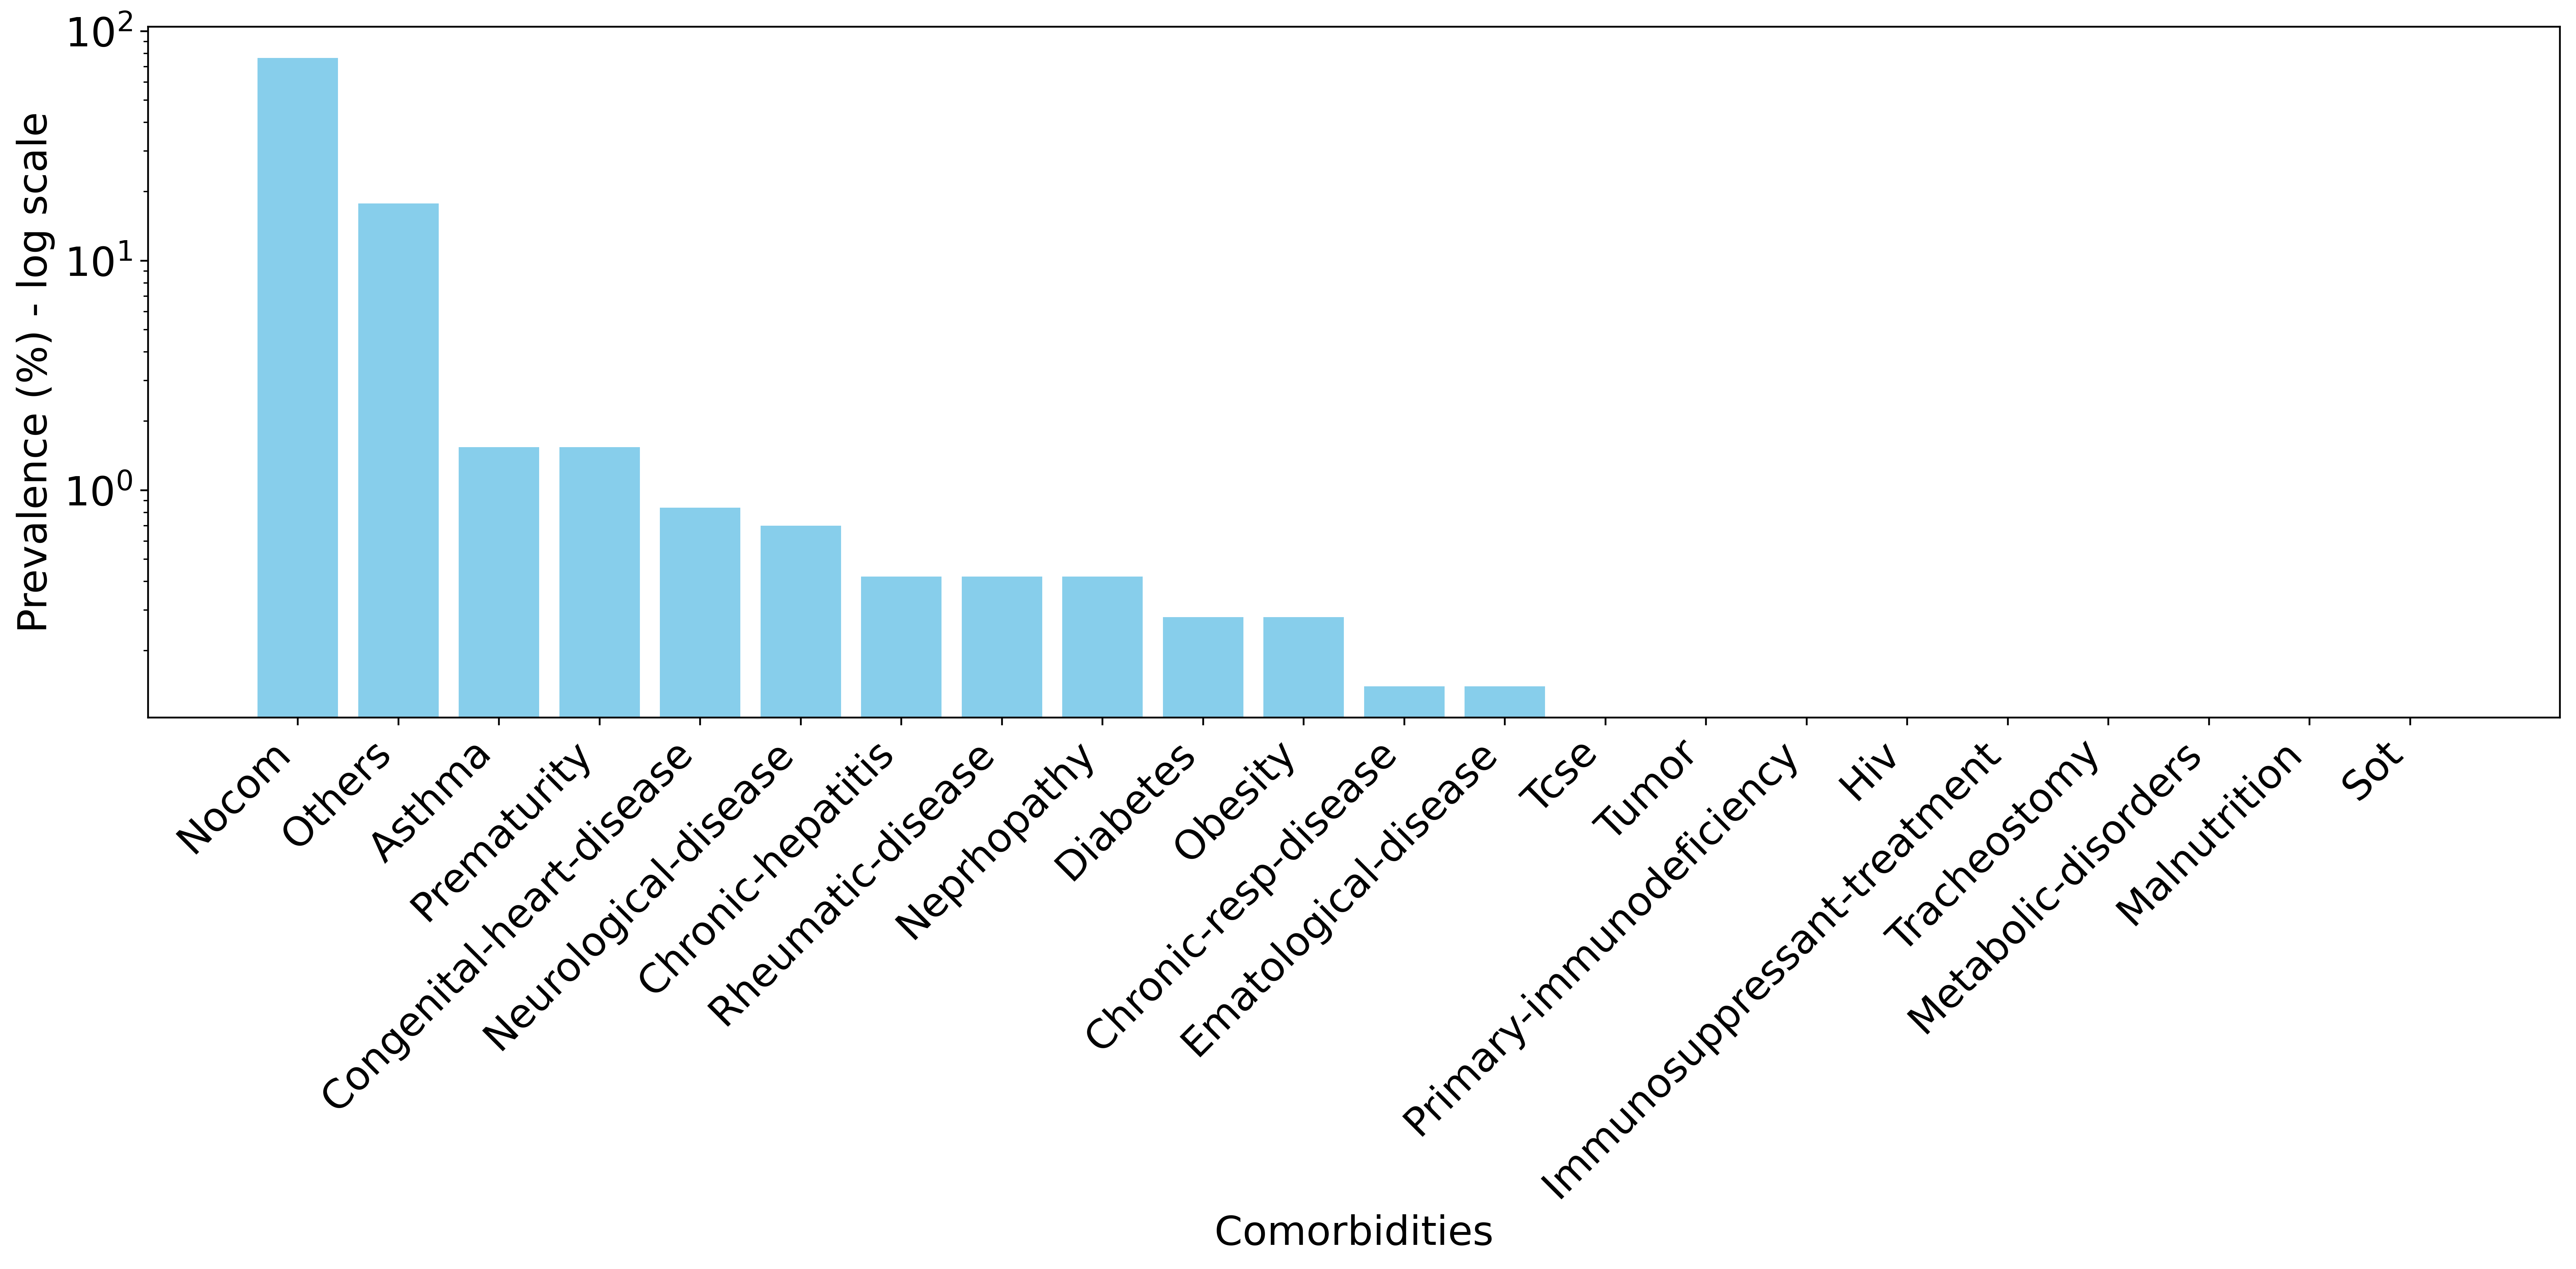

In [ ]:
df_prev = pd.DataFrame.from_dict(dict_com_prev, orient='index', columns=['Percentage'])
df_prev_ren = df_prev.rename(index=lambda x: x.replace('com_', '').capitalize())

# sort the dataframe by percentage
df_prev_ren = df_prev_ren.sort_values(by='Percentage', ascending=False)

plt.figure(figsize=(16, 8), dpi = 500)
plt.bar(df_prev_ren.index, df_prev_ren['Percentage'], color='skyblue')
plt.xlabel('Comorbidities', fontsize = 18)
plt.ylabel('Prevalence (%) - log scale', fontsize = 18)
plt.xticks(rotation=45, ha='right', fontsize = 18)
plt.yticks(fontsize = 18)
plt.tight_layout() 
plt.yscale('log')
plt.show()

In [10]:
# Check prevalence and remove comorbidities with prevalence less than 1%
# columns that start with 'com_' are comorbidities
cols_com = [col for col in df_f_risk.columns if 'com_' in col]
df_f_risk, list_removed = check_prevalence(df_f_risk, cols_com)
print("Comorbidities with no prevalence:")
print((list_removed))

com_prematurity 1.549053356282272
com_obesity 0.17211703958691912
com_diabetes 0.34423407917383825
com_asthma 1.8932874354561102
com_chronic-resp-disease 0.17211703958691912
com_congenital-heart-disease 0.8605851979345954
com_neurological-disease 0.6884681583476765
com_TCSE 0.0
com_SOT 0.0
com_tumor 0.0
com_primary-immunodeficiency 0.0
com_immunosuppressant-treatment 0.0
Comorbidities with no prevalence:
['com_TCSE', 'com_SOT', 'com_tumor', 'com_primary-immunodeficiency', 'com_immunosuppressant-treatment']


In [ ]:
# Check prevalence of symptoms
# columns that start with 'sym_' are symtpoms
dict_sym_prev = {}
cols_sym = [col for col in df_f_risk.columns if 'sym_' in col]
#exclude columns with 'od' or 'td'
cols_sym = [col for col in cols_sym if 'od' not in col and 'td' not in col and 'text' not in col]
for col in cols_sym:
    mask = df_f_risk[col] == 1
    count = len(df_f_risk[mask])
    N = count
    D = df_f_risk.loc[:, col].shape[0]
    prevalence = N/D * 100
    dict_sym_prev[col] = prevalence
    print(col, prevalence)

sym_fever 48.364888123924274
sym_rhinitis 23.752151462994835
sym_cough 15.66265060240964
sym_dyspnea 1.2048192771084338
sym_ear-pain 0.34423407917383825
sym_myalgia 4.130808950086059
sym_arthralgia 2.753872633390706
sym_sore-throat 5.507745266781412
sym_smell-taste-alterations 8.089500860585199
sym_conjunctivitis 2.0654044750430294
sym_asthenia 16.523235800344235
sym_headache 17.21170395869191
sym_confusion 0.17211703958691912
sym_abdominal-pain 2.9259896729776247
sym_nausea/vomit 4.991394148020654
sym_diarrhea 7.401032702237521
sym_lack-appetite 4.475043029259897
sym_polyadenopathy 0.17211703958691912
sym_skin-rash 2.2375215146299485
sym_pneumonia 0.5163511187607573
sym_other 6.712564543889846


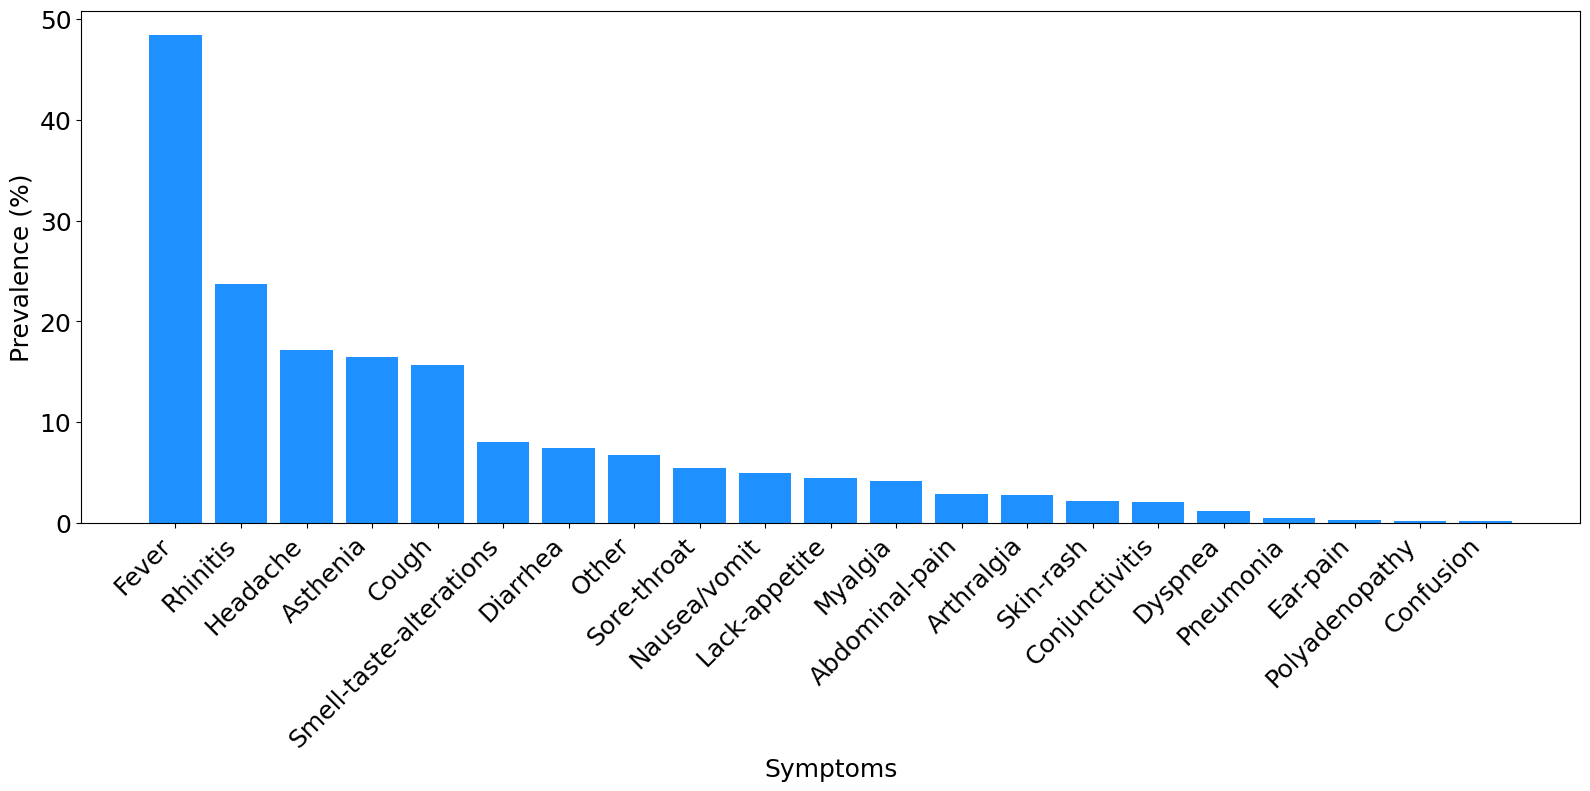

In [ ]:
df_prevalencevals = pd.DataFrame.from_dict(dict_sym_prev, orient='index', columns=['Prevalence (%)'])
df_prev_ren2 = df_prevalencevals.rename(index=lambda x: x.replace('enr_symptoms___', '').capitalize())

# sort the dataframe by percentage
df_prev_ren2 = df_prev_ren2.sort_values(by='Prevalence (%)', ascending=False)

# change x ticks by removing the prefix 'Sym_' and then capitalize
df_prev_ren2.index = df_prev_ren2.index.str.replace('Sym_', '').str.capitalize()

plt.figure(figsize=(16, 8), dpi = 100)
plt.bar(df_prev_ren2.index, df_prev_ren2['Prevalence (%)'], color='dodgerblue')
plt.xlabel('Symptoms', fontsize = 18)
plt.ylabel('Prevalence (%)', fontsize = 18)
plt.xticks(rotation=45, ha='right', fontsize = 18)
plt.yticks(fontsize = 18)
plt.tight_layout()
plt.show()

In [12]:
df_f_risk = extract_new_info(df_f_risk)

In [13]:
df_f_risk

,age_enrollment,gender,ethnicity,vax_DTP,vax_IPV/OPV,vax_HBV,vax_Hib,vax_MPR,vax_Varicella,vax_PCV,...,duration_diarrhea,duration_lack-appetite,duration_polyadenopathy,duration_skin-rash,duration_pneumonia,duration_other,median_sym_duration,infection_category,VOC,hex_vax
record_id,,,,,,,,,,,,,,,,,,,,,
F002-d,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,1,0,0
F012-d,0,1,5,1,1,1,1,0,0,0,...,0,0,0,0,0,0,2.0,1,0,1
F010-b,0,0,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,4.0,1,0,1
F166-a,0,0,5,1,1,1,1,0,0,1,...,0,0,0,0,0,0,1.0,1,0,1
F071-a,0,0,5,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F015-d,18,0,5,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0.0,0,0,1
F124-d,19,0,5,1,1,1,1,1,1,1,...,0,0,0,0,0,3,3.0,1,0,1
F332-d,19,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,0


In [14]:
# check individuals with covid vax and with hexavalent vax
df_f_risk['vax_covid_firstdose'].value_counts()

vax_covid_firstdose
 0.0    500
 1.0     52
-1.0     29
Name: count, dtype: int64

In [15]:
df_f_risk['hex_vax'].value_counts()

hex_vax
1    532
0     49
Name: count, dtype: int64

In [16]:
df_f_risk['vax_flu_2019-2020'].value_counts()

vax_flu_2019-2020
 0.0    407
-1.0    145
 1.0     29
Name: count, dtype: int64

In [17]:
df_f_risk['vax_flu_2020_2021'].value_counts()

vax_flu_2020_2021
 0.0    309
-1.0    209
 1.0     63
Name: count, dtype: int64

In [18]:
# Remove non referable symptoms: headache and smell and taste alterations
df_f_risk = remove_non_referable_symptoms(df_f_risk)

In [19]:
df_f_risk

,age_enrollment,gender,ethnicity,vax_DTP,vax_IPV/OPV,vax_HBV,vax_Hib,vax_MPR,vax_Varicella,vax_PCV,...,duration_diarrhea,duration_lack-appetite,duration_polyadenopathy,duration_skin-rash,duration_pneumonia,duration_other,median_sym_duration,infection_category,VOC,hex_vax
record_id,,,,,,,,,,,,,,,,,,,,,
F002-d,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.0,1,0,0
F012-d,0,1,5,1,1,1,1,0,0,0,...,0,0,0,0,0,0,2.0,1,0,1
F010-b,0,0,3,1,1,1,1,0,0,0,...,0,0,0,0,0,0,4.0,1,0,1
F166-a,0,0,5,1,1,1,1,0,0,1,...,0,0,0,0,0,0,1.0,1,0,1
F071-a,0,0,5,1,1,1,1,1,1,1,...,0,1,0,0,0,0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F015-d,18,0,5,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0.0,0,0,1
F124-d,19,0,5,1,1,1,1,1,1,1,...,0,0,0,0,0,3,3.0,1,0,1
F332-d,19,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,0,0,0


In [20]:
print("Asymptomatic: ", df_f_risk[df_f_risk['infection_category'] == 0].shape[0])
print("Short infection: ", df_f_risk[df_f_risk['infection_category'] == 1].shape[0])
print("Long infection: ", df_f_risk[df_f_risk['infection_category'] == 2].shape[0])

Asymptomatic:  319
Short infection:  194
Long infection:  68


In [21]:
print("pre-Omicron", df_f_risk[df_f_risk['VOC'] == 0].shape[0])
print("Omicron", df_f_risk[df_f_risk['VOC'] == 1].shape[0] )

pre-Omicron 428
Omicron 135


In [22]:
# Save manipulated dataset
df_f_risk.to_csv('../data/dataset_manipulated.csv')